In [1]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

## DATA

In [2]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

## REGRESION BEST LINE

In [3]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.3 4.3


In [4]:
regression_line = [(m*x)+b for x in xs]

In [5]:
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)

In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

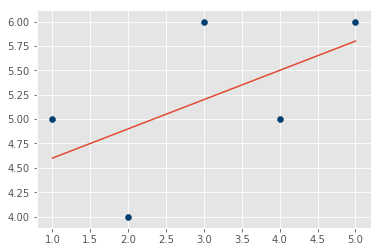

In [7]:
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

## PREDICT

In [8]:
# WHAT DO YOU WHANT TO PREDICT
predict_x = 7

In [9]:
predict_y = (m*predict_x)+b
print(predict_y)

6.4


##ALL ON THE GRAPH

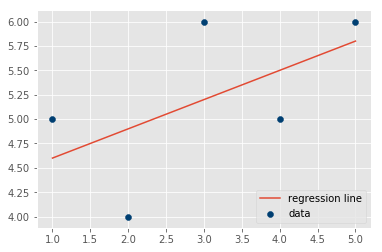

In [10]:
predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

## R2 coefficient of determination

In [11]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

In [12]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [13]:
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

In [14]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.321428571429


## CREATING THE DATA

In [15]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

In [16]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b

In [17]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print(squared_error_regr)
    print(squared_error_y_mean)

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared

21919016.8558
43612093.91
0.497409665745


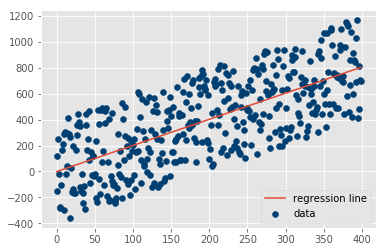

In [18]:
import pandas as pd

xs, ys = create_dataset(400,400,2,correlation='pos')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

raw_data = {'xs': xs,'ys': ys}
df_xs = pd.DataFrame(raw_data, columns = ['xs', 'ys'])
#df_xs
df_xs.to_csv('data_regresion.csv')


18296.95197
35953.5
0.491093997247


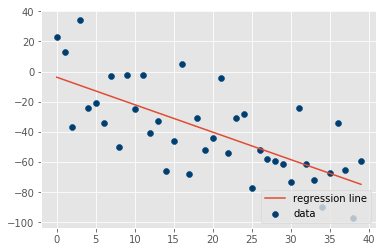

In [19]:
xs, ys = create_dataset(40,40,2,correlation='neg')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

## INTERPOLATION

In [73]:
#import plotly.plotly as py
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
points = np.array([(1, 1), (2, 4), (3, 1), (9, 3)])
x = points[:,0]
y = points[:,1]

x=np.array([0,1,2,3,4,5])
y=np.array([0,0.8,0.9,0.1,-0.8,-1])

In [22]:
# calculate polynomial
p1=np.polyfit(x,y,1)
p2=np.polyfit(x,y,2)
p3=np.polyfit(x,y,5)

In [23]:
print(p1)
print(p2)
print(p3)
plt.plot(x,y,'o')

[-0.30285714  0.75714286]
[-0.16071429  0.50071429  0.22142857]
[ -8.33333333e-03   1.25000000e-01  -5.75000000e-01   6.25000000e-01
   6.33333333e-01   4.08176161e-15]


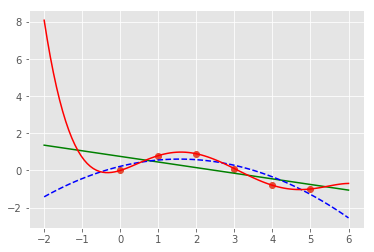

In [24]:
xp=np.linspace (-2,6,100)
plt.plot(xp,np.polyval(p1,xp),'-g')
plt.plot(xp,np.polyval(p2,xp),'b--')
plt.plot(xp,np.polyval(p3,xp),'r')
plt.show()

In [25]:
yfit=p1[0]*x+p1[1]
print(yfit)
print(y)
yresid=y-yfit
SSresid=sum(pow(yresid,2))
SStotal=len(y)*np.var(y)
rsq=1-SSresid/SStotal
print(rsq)
#plt.show()

[ 0.75714286  0.45428571  0.15142857 -0.15142857 -0.45428571 -0.75714286]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]
0.517788018433


## DATA FROM PANDAS

In [26]:
import pandas as pd

In [27]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
        'age': [42, 52, 36, 24, 73],
        'preTestScore': [4, 24, 31, ".", "."],
        'postTestScore': ["25,000", "94,000", 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [28]:
#df.to_csv('../example.csv')
df.to_csv('example.csv')

In [29]:
df = pd.read_csv('example.csv')
df

,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,0,Jason,Miller,42,4,"25,000"
1,1,Molly,Jacobson,52,24,"94,000"
2,2,Tina,.,36,31,57
3,3,Jake,Milner,24,.,62
4,4,Amy,Cooze,73,.,70


## FROM EXCEL TO PANDAS

In [30]:
xls_file = pd.ExcelFile('data_excel.xls')
xls_file

In [31]:
xls_file.sheet_names

['Ark1']

In [32]:
df = xls_file.parse('Ark1')
df

,Nr,X,Y
0,1,-3,2
1,2,-2,-5
2,3,2,3
3,4,4,5
4,5,7,4
5,6,10,-3


In [33]:
y = np.array(df['Y'])
print(y)

[ 2 -5  3  5  4 -3]


## Descriptive Statistics

In [34]:
df = pd.read_csv('data_regresion.csv')

In [35]:
df.describe()

,Unnamed: 0,xs,ys
count,400.000000,400.000000,400.000000
mean,199.500000,199.500000,401.235000
std,115.614301,115.614301,330.610789
min,0.000000,0.000000,-359.000000
25%,99.750000,99.750000,160.000000
50%,199.500000,199.500000,422.500000
75%,299.250000,299.250000,657.250000
max,399.000000,399.000000,1167.000000


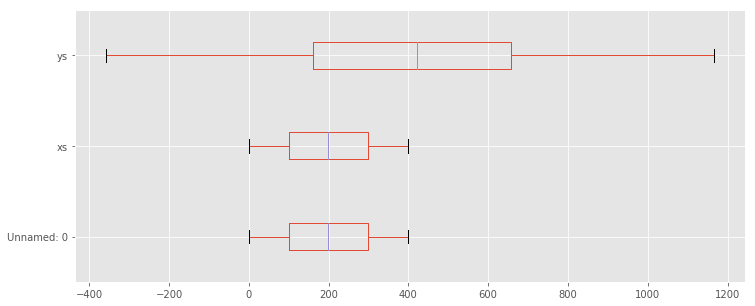

In [36]:
df.plot.box(vert=False,figsize=(12, 5))
plt.show()

In [37]:
a = ['xs', 'ys']
i = [j for j in range (len(a))]
b_var = df[a].var()
for i in range(len (a)):
    print("variance for ", a[i], "=", b_var[i])

variance for  xs = 13366.6666667
variance for  ys = 109303.493509


In [38]:
b_std = df[a].std()
for i in range(len (a)):
    print("standard deviation for ", a[i], "=", b_std[i])

standard deviation for  xs = 115.614301307
standard deviation for  ys = 330.610788555


In [39]:
plt.figure(figsize=(7,5))

b_std.plot.bar(label='standard deviation')
plt.ylabel('standard deviation')
plt.legend()

In [40]:
df.corr()

,Unnamed: 0,xs,ys
Unnamed: 0,1.000000,1.000000,0.705273
xs,1.000000,1.000000,0.705273
ys,0.705273,0.705273,1.000000


In [41]:
df.cov()

,Unnamed: 0,xs,ys
Unnamed: 0,13366.666667,13366.666667,26957.877193
xs,13366.666667,13366.666667,26957.877193
ys,26957.877193,26957.877193,109303.493509


## Linear Regression

In [42]:
#https://chrisalbon.com/machine-learning/linear_regression_scikit-learn.html
import pandas as pd
from sklearn import linear_model
import random
import numpy as np
%matplotlib inline

In [43]:
df = pd.read_csv('data_regresion.csv')

In [44]:
df.head()

,Unnamed: 0,xs,ys
0,0,0.0,120.0
1,1,1.0,-154.0
2,2,2.0,247.0
3,3,3.0,-20.0
4,4,4.0,-275.0


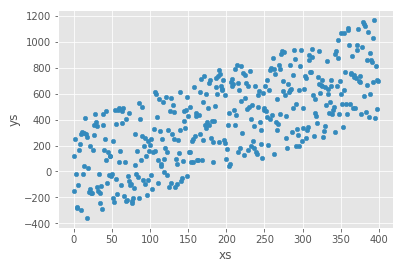

In [45]:
df.plot(x='xs', y='ys', kind='scatter')
#plt.show()

In [46]:
X = df['xs']
y = df['ys']
# Create our test data from the first 30 observations
X_test = X[0:30].reshape(-1,1)
y_test = y[0:30]

# Create our training data from the remaining observations
X_train = X[30:].reshape(-1,1)
y_train = y[30:]

C:\Python35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Python35\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [47]:
# Create an object that is an ols regression
ols = linear_model.LinearRegression()

In [48]:
# Train the model using our training data
model = ols.fit(X_train, y_train)

In [49]:
# View the R-Squared score
model.score(X_test, y_test)

-0.043489951911712676

In [50]:
# Run the model on X_test and show the first five results
list(model.predict(X_test)[0:5])

[-19.950310141842579,
 -17.864849110500277,
 -15.779388079157975,
 -13.693927047815674,
 -11.608466016473372]

## KNN

In [51]:
import pandas as pd
from sklearn import neighbors
import numpy as np
%matplotlib inline  
import seaborn

In [52]:
training_data = pd.DataFrame()

training_data['test_1'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
training_data['test_2'] = [0.5846,0.2654,0.2615,0.4538,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]
training_data['outcome'] = ['win','win','win','win','win','loss','loss','loss','loss','loss']

training_data.head()

,test_1,test_2,outcome
0,0.3051,0.5846,win
1,0.4949,0.2654,win
2,0.6974,0.2615,win
3,0.3769,0.4538,win
4,0.2231,0.4615,win


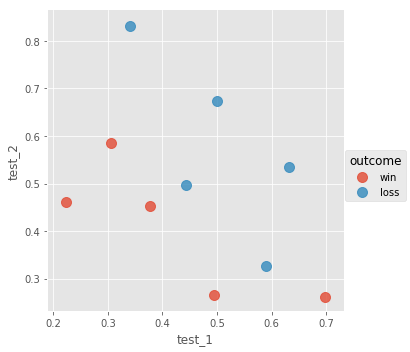

In [53]:
seaborn.lmplot('test_1', 'test_2', data=training_data, fit_reg=False,hue="outcome", scatter_kws={"marker": "D","s": 100})

In [54]:
X = training_data.as_matrix(columns=['test_1', 'test_2'])
#X = training_data.as_matrix(columns=['test_1'])
y = np.array(training_data['outcome'])

In [55]:
clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')
trained_model = clf.fit(X, y)

In [56]:
trained_model.score(X, y)

0.80000000000000004

## Apply The Learner To A New Data Point

In [57]:
# Create a new observation with the value of the first independent variable, 'test_1', as .4
# and the second independent variable, test_1', as .6
x_test = np.array([[.4,.6]])

In [58]:
# Apply the learner to the new, unclassified observation.
print(trained_model.predict(x_test))

['loss']


In [59]:
#We can even look at the probabilities the learner assigned to each class:
trained_model.predict_proba(x_test)

array([[ 0.66666667,  0.33333333]])

## K MEANS

In [60]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np



In [61]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

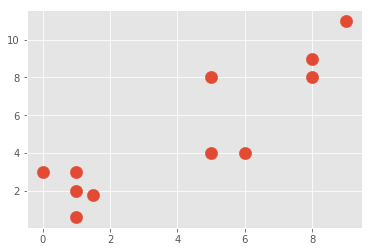

In [62]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [63]:
colors = 10*["g","r","c","b","k"]

In [64]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
            print ('centroid :',i,'=',self.centroids[i])

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [65]:
clf = K_Means()
clf.fit(X)

centroid : 0 = [ 1.  2.]
centroid : 1 = [ 1.5  1.8]
484.722222222
13.0
52.1072796935


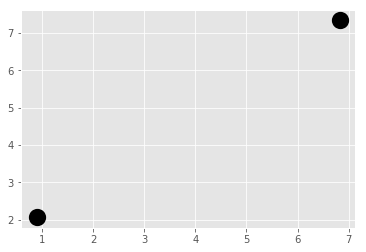

In [66]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

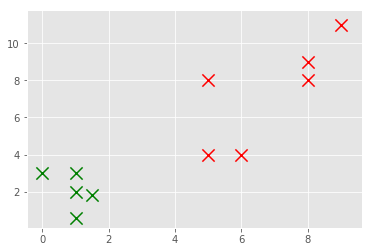

In [67]:
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

In [68]:
plt.show()

## SAVE TO FILE

In [69]:
import pandas as pd 
import numpy as np

res = np.array( [1, 2, 3, 4, 5])
res2 = np.array([9, 9, 9, 9, 9]) 
my_df = pd.DataFrame(res,res2) 
my_df.to_csv('out.csv', index=False, header=False)

a= np.append(res, res2, axis=0)



a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = [1,2,3,4]
d = [5,6,7,8]

df = pd.DataFrame({"name1" : c, "name2" : d})
df.to_csv("submission2.csv", index=False)

In [70]:
## IMAGE

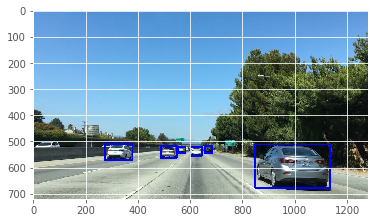

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')
#w, h = image.shape[::-1]


def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    draw_img = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return draw_img

# Here are the bounding boxes I used
bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]

result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()


## SOBEL

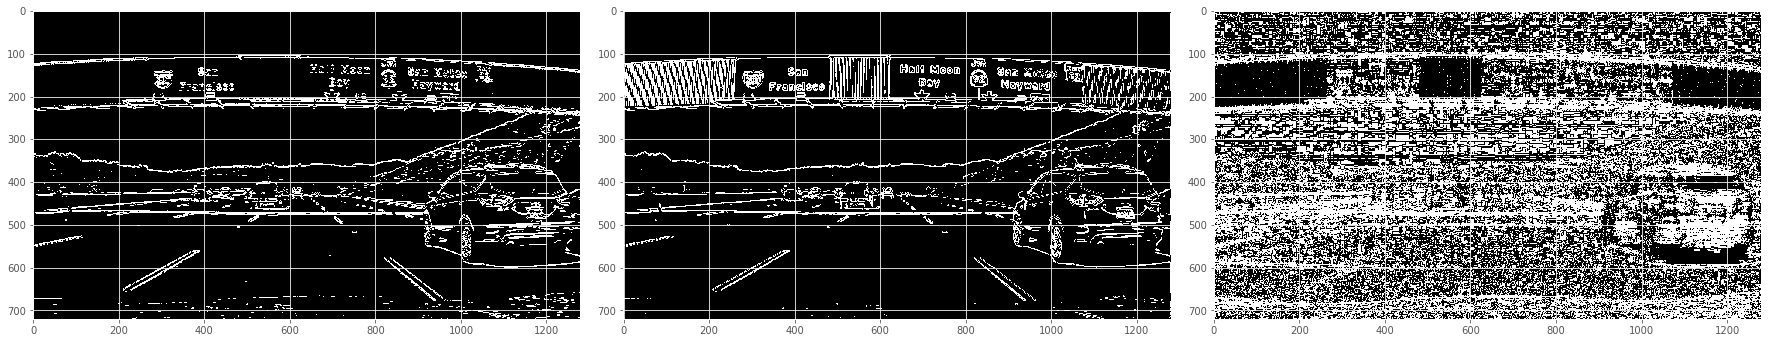

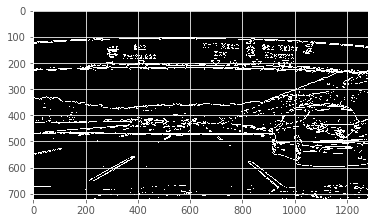

In [72]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
#image = cv2.imread('test_images_udacity/test1.jpg')
image = mpimg.imread('signs_vehicles_xygrad.jpg')
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    #cv2.imshow('img3', gray)
    # Return the result
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return binary_output


def nothing(*arg):
    pass

# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

##################    # Return the binary image
##################
##################    # Generate trackbar Window Name
##################    TrackbarName = "Trackbar"
##################    WindowName = "dir_binary"
##################    # Make Window and Trackbar
##################    cv2.namedWindow(WindowName)
##################    cv2.createTrackbar(TrackbarName, WindowName, 0, 255, nothing)
##################
##################    # Allocate destination image
##################    Threshold = np.zeros(img.shape, np.uint8)
##################
##################    # Loop for get trackbar pos and process it
##################    while True:
##################        # Get position in trackbar
##################        TrackbarPos = cv2.getTrackbarPos(TrackbarName, WindowName)
##################        # Apply threshold
##################        cv2.threshold(img, TrackbarPos, 255, cv2.THRESH_BINARY, Threshold)
##################        # Show in window
##################        cv2.imshow(WindowName, Threshold)
##################
##################        # If you press "ESC", it will return value
##################        ch = cv2.waitKey(5)
##################        if ch == 27:
##################            break
##################
##################    cv2.destroyAllWindows()
##################   
##################    return Threshold






    return binary_output





ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Run the function

thresh_change=(1,10)   

gradx = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
grady = abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=100)
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=thresh_change)

# Plot the result
#cv2.imshow('img2', image)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(grady, cmap='gray')
ax2.imshow(mag_binary, cmap='gray')
ax3.imshow(dir_binary, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()

plt.imshow(grady, cmap='gray')

##plt.imshow(mag_binary, cmap='gray')
##plt.imshow(dir_binary, cmap='gray')
##plt.show()
##combined = np.zeros_like(dir_binary)
##combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
##
##plt.imshow(combined, cmap='gray')
##plt.show()







## K-MEANS

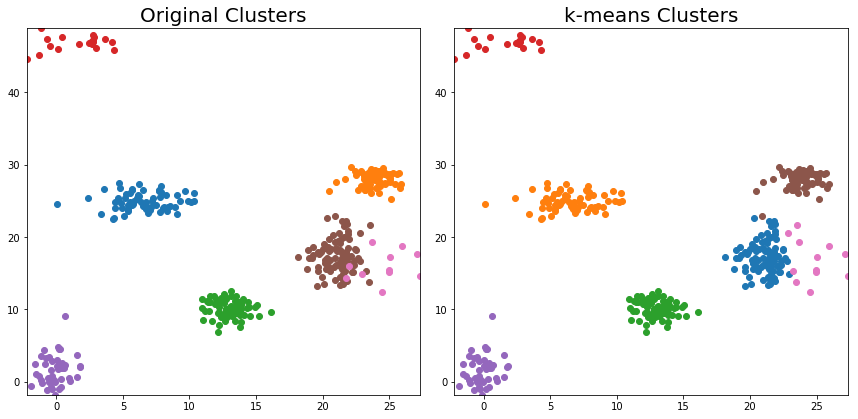

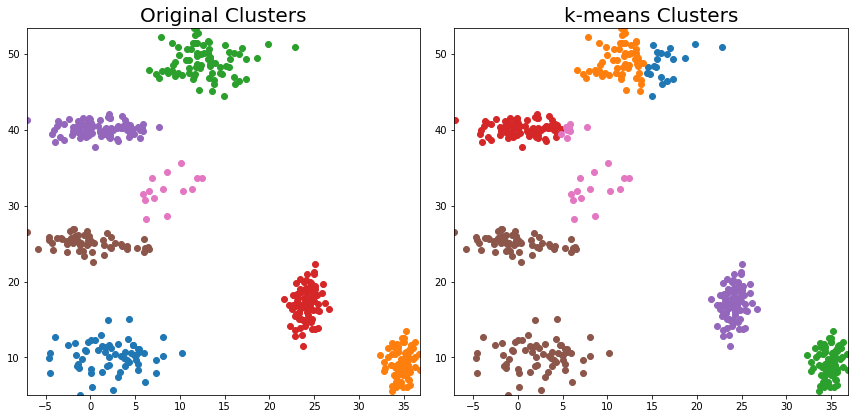

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3), 
                x_off=(0, 50), y_off=(0, 50)):
    
    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the y-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction
    
    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    # Genereate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
     
    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    
    # Return cluster positions
    return clusters_x, clusters_y

# Generate some clusters!
n_clusters = 7
clusters_x, clusters_y = cluster_gen(n_clusters)
# Convert to a single dataset in OpenCV format
data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()

# Define k-means parameters
# Number of clusters to define
k_clusters = 7
# Maximum number of iterations to perform
max_iter = 10
# Accuracy criterion for stopping iterations
epsilon = 1.0
# Define criteria in OpenCV format
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Call k-means algorithm on your dataset
compactness, label, center = cv2.kmeans(data, k_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Define some empty lists to receive k-means cluster points
kmeans_clusters_x = []
kmeans_clusters_y = []

# Extract k-means clusters from output
for idx in range (k_clusters):
    kmeans_clusters_x.append(data[label.ravel()==idx][:,0])
    kmeans_clusters_y.append(data[label.ravel()==idx][:,1])
    
# Plot up a comparison of original clusters vs. k-means clusters
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])
for idx, xpts in enumerate(clusters_x): 
    plt.plot(xpts, clusters_y[idx], 'o')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.title('Original Clusters', fontsize=20)
plt.subplot(122)
for idx, xpts in enumerate(kmeans_clusters_x):
    plt.plot(xpts, kmeans_clusters_y[idx], 'o')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.title('k-means Clusters', fontsize=20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)
plt.show()

## DBSCAN Algorithm

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3), 
                x_off=(0, 50), y_off=(0, 50)):
    
    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the x-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction
    
    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    # Genereate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
     
    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    
    # Return cluster positions
    return clusters_x, clusters_y


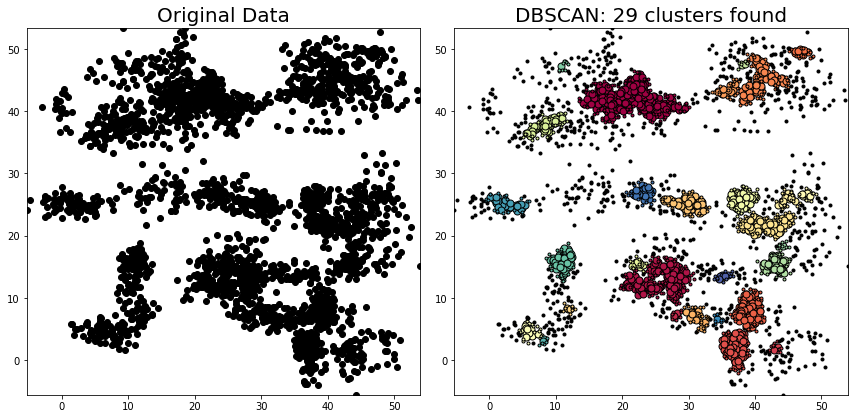

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN
#from extra_functions import cluster_gen

# Generate some clusters!
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)
# Convert to a single dataset in OpenCV format
data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()
# Define max_distance (eps parameter in DBSCAN())
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)
# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Plot up the results!
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(data[:,0], data[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

plt.subplot(122)
# The following is just a fancy way of plotting core, edge and outliers
# Credit to: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)
plt.show()

## HISTOGRAM

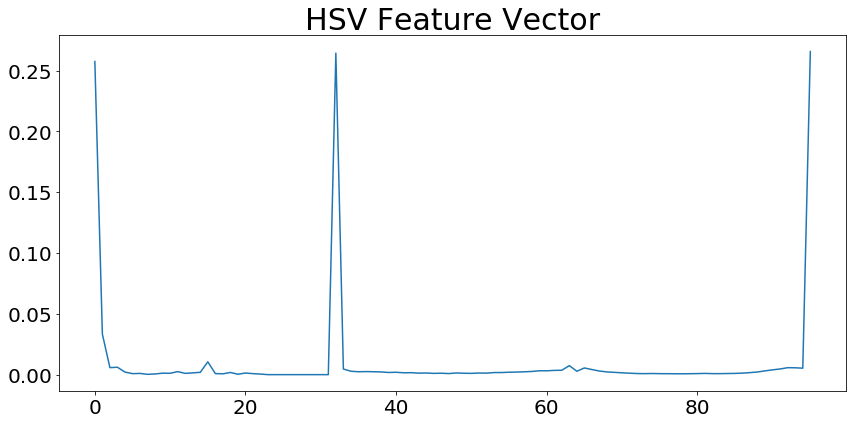

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in an image
image = mpimg.imread('kuka_kr240.jpg')
#plt.imshow(image)
# Your other options for input images are:
    # hammer.jpeg
    # beer.jpeg
    # bowl.jpeg
    # create.jpeg
    # disk_part.jpeg
    
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Convert from RGB to HSV using cv2.cvtColor()
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Compute the histogram of the HSV channels separately
    h_hist = np.histogram(hsv_img[:,:,0], bins=nbins, range=bins_range)
    s_hist = np.histogram(hsv_img[:,:,1], bins=nbins, range=bins_range)
    v_hist = np.histogram(hsv_img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((h_hist[0], s_hist[0], v_hist[0])).astype(np.float64)
    # Normalize the result
    norm_features = hist_features / np.sum(hist_features)
    # Return the feature vector
    #print('hallo')
    return norm_features
    
feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if feature_vec is not None:
    fig = plt.figure(figsize=(12,6))
    plt.plot(feature_vec)
    plt.title('HSV Feature Vector', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    fig.tight_layout()
    plt.show()
else:
    print('Your function is returning None...')

# SVM

In [17]:
import numpy as np

# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(100, 500), x_mult=(2, 7), y_mult=(2, 7), 
                             x_off=(0, 50), y_off=(0, 50)):

    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the y-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction

    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    labels = []
    # Generate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)

    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):

        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
        labels.append(np.zeros_like(xpts) + idx)

    # Return cluster positions and labels
    return clusters_x, clusters_y, labels

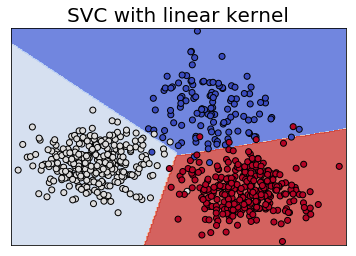

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
#from generate_clusters import cluster_gen

np.random.seed(424) # Change the number to generate a different cluster.

n_clusters = 3
clusters_x, clusters_y, labels = cluster_gen(n_clusters)

# Convert to a training dataset in sklearn format
X = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()
y = np.float32((np.concatenate(labels)))

# Create an instance of SVM and fit the data.
ker = 'linear'
svc = svm.SVC(kernel=ker).fit(X, y)

# Create a mesh that we will use to colorfully plot the decision surface
# Plotting Routine courtesy of: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# Note: this coloring scheme breaks down at > 7 clusters or so

h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # -1 and +1 to add some margins
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Classify each block of the mesh (used to assign its color)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with '+ker+' kernel', fontsize=20)
plt.show()